## **KSL FINGERSPELLING RECOGNITION** 

### INTRODUCTION

<img src="ksl.png" />

### Overview
- Fingerspelling is a technique that makes use of hand formations to represent words and letters. Using fingerspelling, one can communicate information such as phone numbers, names, and even addresses. However, hearing impaired individuals find it difficult to merge the current technological advancements, such as, smartphones with fingerspelling because they happen to do it a lot faster than their devices. Therefore, there is need to bridge the gap between fingerspelling and typing on smartphones.
- Fingerspelling has grown to become one of the most crucial manual communication systems in the world. For deaf and individuals with hearing impairment issues, fingerspelling is one of the ways that they can communicate with those around them. However, few people are able to discern figerspelling and this leads to communication breakdowns. The use of machine learning technology can help to merge fingerspelling with exact letters and symbols to help enhance communication. 

### Problem Statement
- The deaf and hearing impaired community faces significant communication barriers with the rest of the society. This is because sign language is not widely understood by everyone else around them, and this can lead to difficulties in communication or communication breakdowns. To address this issue, this project aims to develop a Convolutional Neural Network (CNN) model specifically designed for fingerspelling recognition, allowing for accurate identification of individual letters and complete words in different sign languages. By improving the recognition of fingerspelling gestures, the model seeks to enhance communication accessibility for individuals who are deaf or hard of hearing, promoting inclusivity and fostering effective communication with the broader society.

### Objectives
- Our objective is to create an innovative machine learning model that acts as a vital bridge, connecting the deaf and mute community with the wider society.

This model will have the capability to translate various sign languages, including American Sign Language (ASL) and Kenyan Sign Language (KSL), into their corresponding individual letters, enabling the broader community to learn and understand sign language for improved communication with their deaf loved ones. Additionally, this development will empower the deaf and mute community to communicate effectively amongst themselves, fostering inclusivity and enhancing overall interactions. Through this project, we aspire to facilitate seamless communication, foster understanding, and promote inclusiveness between these communities.

#### Specific Objectives
1. Develop a Convolutional Neural Network (CNN) model specifically designed for fingerspelling recognition in different sign languages.
2. Train the model using a large dataset of fingerspelling gestures in various sign languages, ensuring accuracy and reliability in recognizing individual letters and complete words.
3. Conduct extensive testing and evaluation to assess the model's performance and accuracy in recognizing fingerspelling gestures across different sign languages.
4. Deploy the model.

### Data Understanding
- The dataset is publicly available on Kaggle which we then added 379 images taken by the group members doing the fingerspelling.
- The signs provided are based on the Kenyan Sign Language letter database which is made up of 24 classes of letters with the exclusion of `J` and `Z`. The two letters have been excluded because they require the use of motion. 
- Further, the dataset is divided into train and test sets each with 27455 and 7172 cases, respectively. The total number of columns for both is 784. 

### DATA PREPROCESSING

In [383]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import joblib
import os
from os import listdir
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array
from keras.models import Sequential
from keras import layers, initializers, optimizers, regularizers
from tensorflow.keras.utils import to_categorical
import cv2

np.random.seed(180)
plt.style.use("ggplot")

#### Kaggle Dataset

In [384]:
# Reading train and test dataset
train = pd.read_csv("sign_mnist_train.csv")
test = pd.read_csv("sign_mnist_test.csv")

# printing first five rows of the train data 
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [385]:
# a class to decribe the dataset
class Describer:

    #initialize an object
    def __init__(self, df):
        self.df = df
 
    #checking the shape of the data
    def shape(self, name):
        return print(f"The {name} dataset has {self.df.shape[0]} entries and {self.df.shape[1]} columns")

In [386]:
#Viewing the shape of the train dataset
data = Describer(train)
data.shape("train")

The train dataset has 27455 entries and 785 columns


In [387]:
#Viewing the shape of the test dataset
data = Describer(test)
data.shape("test")

The test dataset has 7172 entries and 785 columns


In [388]:
# Displaying the column names
train.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

* The pixel columns represent the pixel intensity of an image and the label column represents what letter the image stands for from 0-23.

In [389]:
# reading the collected raw images
train_generator = ImageDataGenerator().flow_from_directory("train", target_size=(28,28),
                                                           batch_size=400)

Found 348 images belonging to 24 classes.


In [390]:
#Getting all images and labels
train_images, train_labels = next(train_generator)

In [391]:
#Flattening images into lists of pixels
images_list = []
for img_array in train_images:
    gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
    gray = np.expand_dims(gray, 2)
    images_list.append(gray.reshape(-1, 784).flatten().tolist())

In [392]:
#converting the images to a DataFrame
raw_img_df = pd.DataFrame(images_list)
raw_img_df.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,154.608002,160.608002,148.608002,145.608002,118.608002,158.608002,140.249008,148.776001,194.584000,175.332001,...,83.823006,80.975998,75.459999,66.960999,68.288002,69.604004,97.374001,104.559006,108.374001,158.776001
1,179.000000,180.000000,181.000000,181.000000,181.000000,181.000000,182.000000,183.000000,182.000000,184.000015,...,84.996002,74.653999,75.970001,68.052002,66.052002,199.626007,198.996002,197.985001,199.985001,200.985001
2,156.248993,147.847000,154.619003,161.917999,151.917999,159.917999,148.917999,146.917999,156.917999,143.917999,...,57.355003,67.965996,108.750999,139.751007,90.917999,88.917999,82.776001,85.402000,86.608002,93.618996
3,187.229004,177.713013,184.115005,171.332001,179.957993,182.556000,166.115005,188.115005,183.631012,178.630997,...,184.096008,158.807999,185.406006,185.791000,166.072006,165.958008,171.431000,167.431000,166.072006,161.473999
4,179.697998,170.697998,175.697998,183.697998,170.800995,157.399002,172.697998,186.709000,181.779999,172.697998,...,101.372002,145.449005,164.623001,161.623001,171.623001,163.623001,153.623001,158.807999,166.623001,147.623001


In [393]:
# Generating the labels
train_labels = pd.Series([np.argmax(label) for label in train_labels])

In [394]:
# Concatenating the labels and the raw picture dataframe
raw_df = pd.concat([train_labels, raw_img_df], axis=1)
raw_df.columns = train.columns

#Displaying the first 5 rows of the raw images dataframe
raw_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,154.608002,160.608002,148.608002,145.608002,118.608002,158.608002,140.249008,148.776001,194.584000,...,83.823006,80.975998,75.459999,66.960999,68.288002,69.604004,97.374001,104.559006,108.374001,158.776001
1,16,179.000000,180.000000,181.000000,181.000000,181.000000,181.000000,182.000000,183.000000,182.000000,...,84.996002,74.653999,75.970001,68.052002,66.052002,199.626007,198.996002,197.985001,199.985001,200.985001
2,21,156.248993,147.847000,154.619003,161.917999,151.917999,159.917999,148.917999,146.917999,156.917999,...,57.355003,67.965996,108.750999,139.751007,90.917999,88.917999,82.776001,85.402000,86.608002,93.618996
3,10,187.229004,177.713013,184.115005,171.332001,179.957993,182.556000,166.115005,188.115005,183.631012,...,184.096008,158.807999,185.406006,185.791000,166.072006,165.958008,171.431000,167.431000,166.072006,161.473999
4,1,179.697998,170.697998,175.697998,183.697998,170.800995,157.399002,172.697998,186.709000,181.779999,...,101.372002,145.449005,164.623001,161.623001,171.623001,163.623001,153.623001,158.807999,166.623001,147.623001


In [395]:
#splitting the raw df to train and test dataframes 
train_df, test_df = train_test_split(raw_df, test_size=0.25, random_state=180)

#### Combining Datasets
The kaggle dataset labels are from 0-24 with 9 and 25 missing which represent the j and z letters that have been excluded but the raw dataset labels are from 0-23. For the two datasets to be merged, the labels should be similar.

In [398]:
# mapping the labels into correct labels
mapping_dict = {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 10: 9, 11: 10,
                12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19,
                21: 20, 22: 21, 23: 22, 24: 23}

train["label"] = train["label"].map(mapping_dict)
test["label"] = test["label"].map(mapping_dict)

In [399]:
# Concatenating the collected images and the train dataset
train = pd.concat([train, train_df])
train.reset_index(drop=True, inplace=True)

# Displaying the first five rows
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107.0,118.0,127.0,134.0,139.0,143.0,146.0,150.0,153.0,...,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,6,155.0,157.0,156.0,156.0,156.0,157.0,156.0,158.0,158.0,...,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,2,187.0,188.0,188.0,187.0,187.0,186.0,187.0,188.0,187.0,...,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,2,211.0,211.0,212.0,212.0,211.0,210.0,211.0,210.0,210.0,...,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,12,164.0,167.0,170.0,172.0,176.0,179.0,180.0,184.0,185.0,...,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0


In [400]:
# Checking for duplicates
train.duplicated().sum()

0

### EDA

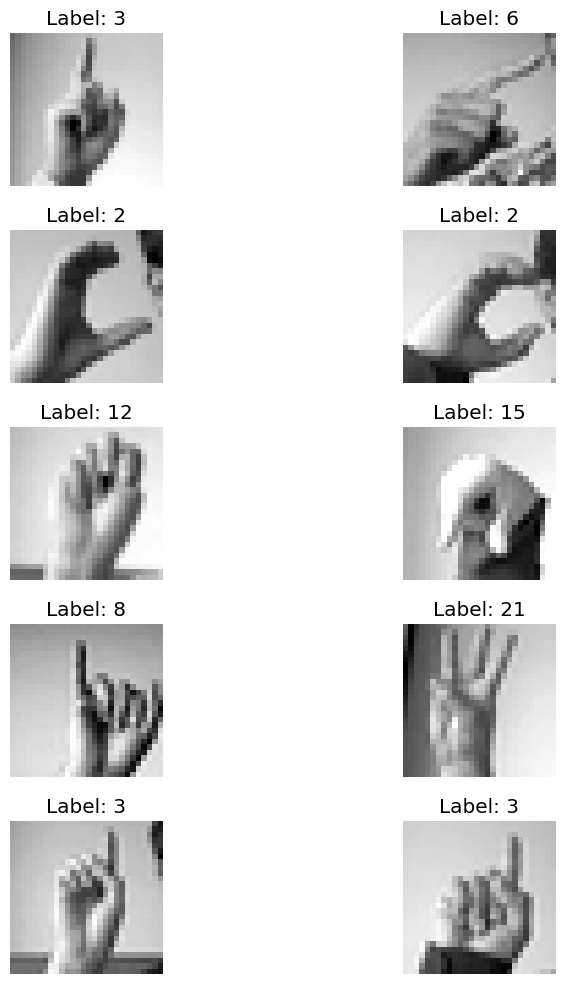

In [402]:
#displaying images
# Extract pixel values and labels
pixel_columns = train.columns[1:]  # Exclude the label column
pixel_values = train[pixel_columns].values
labels = train['label'].values

# Display images
fig, axes = plt.subplots(5, 2, figsize=(8, 10))
fig.tight_layout()

# Display images
for i in range(10):
    row = i // 2  # Calculate the row index
    col = i % 2   # Calculate the column index
    pixel_array = pixel_values[i].reshape(28, 28)  # Assuming the original image size is 28x28
    # Display image on the corresponding subplot
    axes[row, col].imshow(pixel_array, cmap='gray')
    axes[row, col].set_title('Label: ' + str(labels[i]))
    axes[row, col].axis('off')
    
# Show the plot
plt.show()

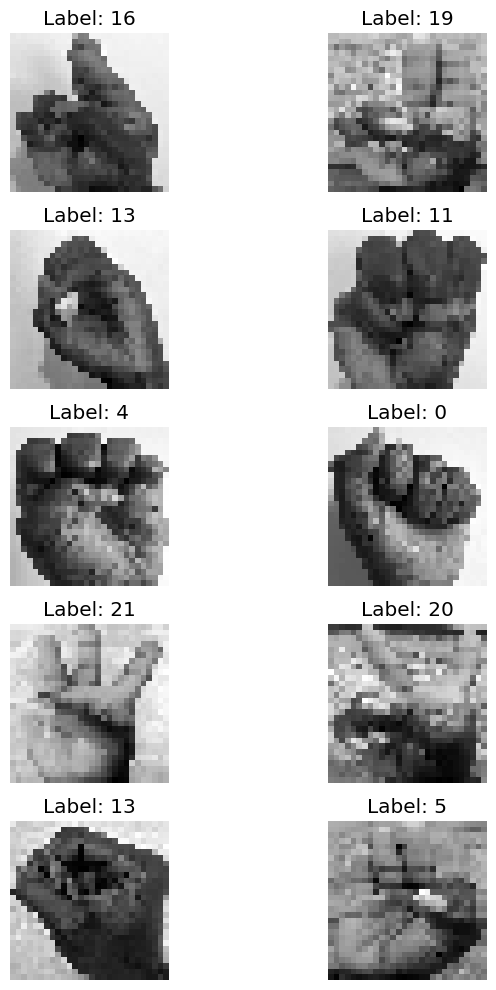

In [403]:
# Displaying the last 10 images
pixel_columns = train.columns[1:]  # Exclude the label column
pixel_values = train[pixel_columns].values
labels = train['label'].values

# Get the last 10 images
last_10_images = pixel_values[-10:]
last_10_labels = labels[-10:]

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 10))

# Display images
for i, ax in enumerate(axes.flat):
    pixel_array = last_10_images[i].reshape(28, 28)  # Assuming the original image size is 28x28
    ax.imshow(pixel_array, cmap='gray')
    ax.set_title('Label: ' + str(last_10_labels[i]))
    ax.axis('off')
plt.tight_layout()
plt.show()

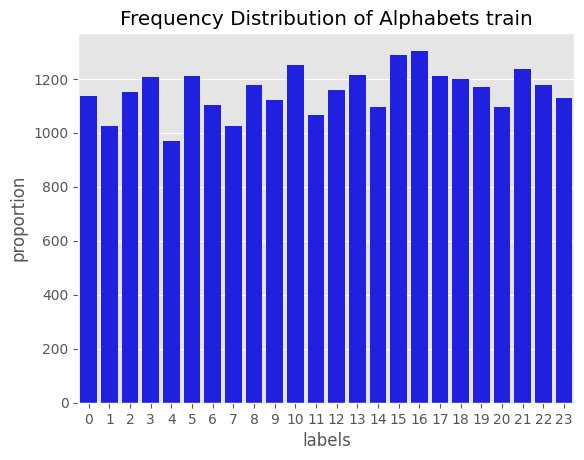

In [404]:

# Distribution of the labels column train dataset
def check_distribution(data, col, name):
  sns.countplot(data=data, x=col, color="blue")
  plt.xlabel('labels')
  plt.ylabel('proportion')
  plt.title(f"Frequency Distribution of Alphabets {(name)}")
  plt.show();

check_distribution(train, 'label', "train")

*  In the analysis conducted, it was found that the label column exhibits a fairly distributed class distribution with no notable class imbalances. All classes display similar proportions, indicating a well-balanced dataset. This characteristic ensures that the model will have an equal opportunity to learn from and make accurate predictions across all classes.

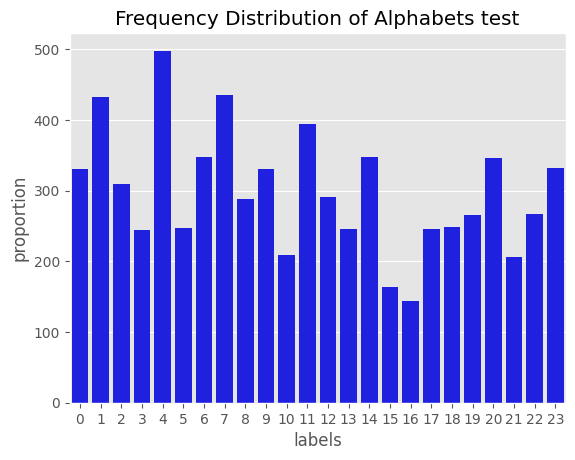

In [405]:

# Distribution of the labels column test dataset
check_distribution(test, 'label', "test")

### MODELLING

In [406]:
# Splitting the train and test datasets
train_X = train.iloc[:, 1:]
train_y = train.label

test_X = test.iloc[:, 1:]
test_y = test.label

In [407]:
#onehot encoding the train and test labels
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [408]:
# Normalizing our train and test data
train_X /= 255
test_X /= 255

#### Baseline Model (Densely connected model)

In [ ]:
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# def create_model():
#     model = Sequential()
#     model.add(layers.Dense(64, activation='relu', input_shape=(784,)))
#     model.add(layers.Dense(32, activation="relu"))
#     model.add(layers.Dense(24, activation='softmax'))
#     model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

# # Create a KerasClassifier wrapper for scikit-learn compatibility
# model = KerasClassifier(build_fn=create_model)

In [ ]:
# # Define the hyperparameter grid
# from sklearn.model_selection import GridSearchCV, KFold

# param_grid = {
#     'epochs': [150, 200, 250],       # Specify different epoch values to evaluate
#     'batch_size': [100, 150, 200]    # Specify different batch size values to evaluate
# }

# # Perform grid search with cross-validation
# kfold = KFold(n_splits=3, shuffle=True)  # Adjust the number of splits as needed
# baseline_grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, verbose=1,
#                              scoring="accuracy")
# baseline_grid_result = baseline_grid.fit(train_X, train_y)

# #Best Params
# print("Best Parameters:")
# print(baseline_grid_result.best_params_)
# print()
# print(baseline_grid_result.best_score_)

* Did a GridSearch to get the optimal values of epochs and batchsize which were epochs=150 and batch_size=100

In [24]:
# two layers baseline model
baseline_model = Sequential()
baseline_model.add(layers.Dense(64, activation="relu", input_shape=(784,)))
baseline_model.add(layers.Dense(32, activation="relu"))
baseline_model.add(layers.Dense(24, activation="softmax"))

#compiling our model
baseline_model.compile(loss="categorical_crossentropy",
                       optimizer="sgd",
                       metrics=["acc"])

#fitting the model
baseline_history = baseline_model.fit(train_X, train_y,
                                      epochs=150, batch_size=100,
                                      validation_split=0.25)

2023-07-06 22:55:23.125075: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-07-06 22:55:23.588691: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 130915456 exceeds 10% of free system memory.


Epoch 1/150
209/209 [==============================] - 3s 7ms/step - loss: 3.1264 - acc: 0.0786 - val_loss: 3.0757 - val_acc: 0.1200
Epoch 2/150
209/209 [==============================] - 2s 7ms/step - loss: 3.0134 - acc: 0.1379 - val_loss: 2.9563 - val_acc: 0.1641
Epoch 3/150
209/209 [==============================] - 2s 7ms/step - loss: 2.8468 - acc: 0.1835 - val_loss: 2.7629 - val_acc: 0.2101
Epoch 4/150
209/209 [==============================] - 1s 6ms/step - loss: 2.6070 - acc: 0.2538 - val_loss: 2.5296 - val_acc: 0.2716
Epoch 5/150
209/209 [==============================] - 2s 7ms/step - loss: 2.3671 - acc: 0.3177 - val_loss: 2.3350 - val_acc: 0.3321
Epoch 6/150
209/209 [==============================] - 2s 8ms/step - loss: 2.1736 - acc: 0.3715 - val_loss: 2.1924 - val_acc: 0.3656
Epoch 7/150
209/209 [==============================] - 2s 8ms/step - loss: 2.0162 - acc: 0.4119 - val_loss: 2.0476 - val_acc: 0.4270
Epoch 8/150
209/209 [==============================] - 2s 7ms/step - 

In [25]:
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 24)                792       
                                                                 
Total params: 53,112
Trainable params: 53,112
Non-trainable params: 0
_________________________________________________________________


In [27]:
print("Baseline model test data accuracy: ")
baseline_model.evaluate(test_X, test_y)

Baseline model test data accuracy: 
225/225 [==============================] - 1s 3ms/step - loss: 1.5275 - acc: 0.7029


[1.5275362730026245, 0.7028722763061523]

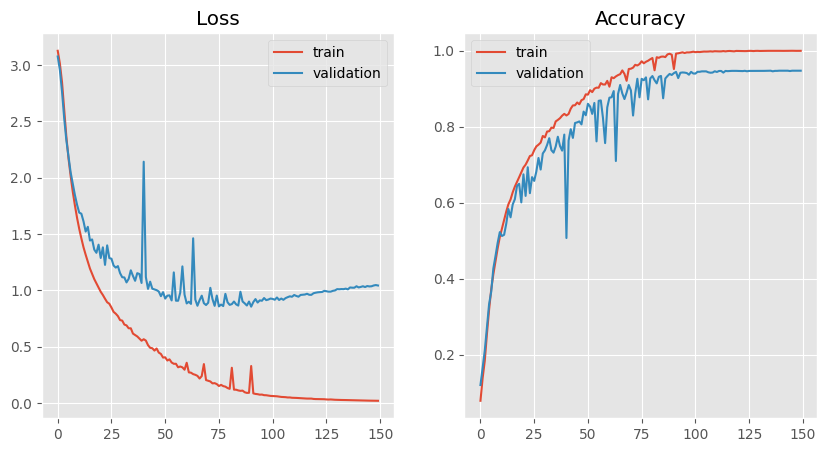

In [28]:
#Plotting the loss and accuracy of the test and validation datasets
def plot_loss_and_accuracy(results, final=False):

    if final:
        val_label="test"
    else:
        val_label="validation"

    # Extracting metrics from model fitting
    train_loss = results.history['loss']
    val_loss = results.history['val_loss']
    train_accuracy = results.history['acc']
    val_accuracy = results.history['val_acc']

    # Setting up plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Plotting loss info
    ax1.set_title("Loss")
    sns.lineplot(x=results.epoch, y=train_loss, ax=ax1, label="train")
    sns.lineplot(x=results.epoch, y=val_loss, ax=ax1, label=val_label)
    ax1.legend()

    # Plotting accuracy info
    ax2.set_title("Accuracy")
    sns.lineplot(x=results.epoch, y=train_accuracy, ax=ax2, label="train")
    sns.lineplot(x=results.epoch, y=val_accuracy, ax=ax2, label=val_label)
    ax2.legend()

#baseline model loss and accuracy 
plot_loss_and_accuracy(baseline_history)

### CNN

In [409]:
#Reshaping the train and test dataset
train_X_reshaped = np.array(train_X).reshape(-1, 28, 28, 1)
test_X_reshaped = np.array(test_X).reshape(-1, 28, 28, 1)

In [50]:
# Fitting a CNN model
cnn_model1 = Sequential()
cnn_model1.add(layers.Conv2D(64, (3,3), activation="tanh", input_shape=(28,28,1)))
cnn_model1.add(layers.MaxPool2D((2,2)))
cnn_model1.add(layers.Conv2D(32, (3,3), activation="tanh"))
cnn_model1.add(layers.MaxPooling2D((2,2)))
cnn_model1.add(layers.Flatten())
cnn_model1.add(layers.Dense(64, activation="tanh"))
cnn_model1.add(layers.Dense(24, activation="softmax"))

#Compiling the model
cnn_model1.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=["acc"])

#Fitting the model
cnn_model1_results = cnn_model1.fit(train_X_reshaped, train_y,
                                  epochs=10, batch_size=100,
                                  validation_split=0.25)


Epoch 1/10
209/209 [==============================] - 24s 111ms/step - loss: 1.4626 - acc: 0.6178 - val_loss: 0.7184 - val_acc: 0.8543
Epoch 2/10
209/209 [==============================] - 28s 135ms/step - loss: 0.2892 - acc: 0.9538 - val_loss: 0.4185 - val_acc: 0.9404
Epoch 3/10
209/209 [==============================] - 24s 114ms/step - loss: 0.0929 - acc: 0.9960 - val_loss: 0.3588 - val_acc: 0.9500
Epoch 4/10
209/209 [==============================] - 25s 119ms/step - loss: 0.0389 - acc: 0.9999 - val_loss: 0.3500 - val_acc: 0.9498
Epoch 5/10
209/209 [==============================] - 22s 105ms/step - loss: 0.0212 - acc: 1.0000 - val_loss: 0.3460 - val_acc: 0.9507
Epoch 6/10
209/209 [==============================] - 22s 103ms/step - loss: 0.0132 - acc: 1.0000 - val_loss: 0.3526 - val_acc: 0.9506
Epoch 7/10
209/209 [==============================] - 21s 100ms/step - loss: 0.0090 - acc: 1.0000 - val_loss: 0.3601 - val_acc: 0.9506
Epoch 8/10
209/209 [==============================] - 2

In [51]:
print("cnn model1 train data accuracy: ")
print(cnn_model1.evaluate(train_X_reshaped, train_y))
print()
print("cnn model1 test data accuracy: ")
print(cnn_model1.evaluate(test_X_reshaped, test_y))

cnn model1 train data accuracy: 
870/870 [==============================] - 9s 10ms/step - loss: 0.0963 - acc: 0.9876
[0.09633519500494003, 0.9875678420066833]

cnn model1 test data accuracy: 
225/225 [==============================] - 2s 10ms/step - loss: 0.2810 - acc: 0.9216
[0.2810279428958893, 0.9216396808624268]


In [410]:
# Fitting a CNN model
cnn_model2 = Sequential()
cnn_model2.add(layers.Conv2D(64, (3,3), activation="tanh", input_shape=(28,28,1)))
cnn_model2.add(layers.MaxPool2D((2,2)))
cnn_model2.add(layers.Conv2D(32, (3,3), activation="tanh"))
cnn_model2.add(layers.MaxPooling2D((2,2)))
cnn_model2.add(layers.Flatten())
cnn_model2.add(layers.Dense(64, activation="tanh"))
cnn_model2.add(layers.Dense(24, activation="softmax"))

#Compiling the model
cnn_model2.compile(loss="categorical_crossentropy",
                  optimizer="rmsprop",
                  metrics=["acc"])

#Fitting the model
cnn_model2_results = cnn_model2.fit(train_X_reshaped, train_y,
                                  epochs=10, batch_size=100,
                                  validation_split=0.25)


Epoch 1/10
208/208 [==============================] - 31s 142ms/step - loss: 1.4601 - acc: 0.6205 - val_loss: 0.7245 - val_acc: 0.8309
Epoch 2/10
208/208 [==============================] - 29s 141ms/step - loss: 0.3381 - acc: 0.9386 - val_loss: 0.3393 - val_acc: 0.9459
Epoch 3/10
208/208 [==============================] - 30s 144ms/step - loss: 0.0884 - acc: 0.9940 - val_loss: 0.2174 - val_acc: 0.9685
Epoch 4/10
208/208 [==============================] - 30s 143ms/step - loss: 0.0207 - acc: 0.9996 - val_loss: 0.2048 - val_acc: 0.9687
Epoch 5/10
208/208 [==============================] - 31s 147ms/step - loss: 0.0051 - acc: 1.0000 - val_loss: 0.2151 - val_acc: 0.9685
Epoch 6/10
208/208 [==============================] - 29s 141ms/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.2233 - val_acc: 0.9685
Epoch 7/10
208/208 [==============================] - 30s 143ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.2289 - val_acc: 0.9687
Epoch 8/10
208/208 [==============================] - 3

In [411]:
print("cnn model2 train data accuracy: ")
print(cnn_model2.evaluate(train_X_reshaped, train_y))
print()
print("cnn model2 test data accuracy: ")
print(cnn_model2.evaluate(test_X_reshaped, test_y))

cnn model2 train data accuracy: 
867/867 [==============================] - 12s 13ms/step - loss: 0.0599 - acc: 0.9921
[0.05985025689005852, 0.9921345114707947]

cnn model2 test data accuracy: 
225/225 [==============================] - 3s 12ms/step - loss: 0.2594 - acc: 0.9350
[0.25941339135169983, 0.9350250959396362]


#### evaluating raw dataset

In [423]:
raw_test_X = test_df.iloc[:, 1:]
raw_test_y = to_categorical(test_df.label)

#scaling
raw_test_X /= 255

In [429]:
raw_test_X = np.array(raw_test_X).reshape(-1, 28, 28, 1)

In [432]:
cnn_model2.evaluate(raw_test_X, raw_test_y)

3/3 [==============================] - 0s 29ms/step - loss: 5.4354 - acc: 0.1839


[5.435421943664551, 0.18390804529190063]

In [35]:
#fitting the third CNN model
cnn_model3 = Sequential()
cnn_model3.add(layers.Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1)))
cnn_model3.add(layers.MaxPooling2D((2, 2)))
cnn_model3.add(layers.Conv2D(32, (3,3), activation="relu"))
cnn_model3.add(layers.MaxPooling2D((2,2)))
cnn_model3.add(layers.Flatten())
cnn_model3.add(layers.Dense(64, activation="relu"))
cnn_model3.add(layers.Dense(24, activation="softmax"))

# Compiling the CNN model
cnn_model3.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=["acc"])

# Fitting the CNN model
cnn_model3_results = cnn_model3.fit(train_X_reshaped, train_y,
                            epochs=10, batch_size=100,
                            validation_split=0.25)

Epoch 1/10
209/209 [==============================] - 31s 138ms/step - loss: 2.0307 - acc: 0.4065 - val_loss: 1.1641 - val_acc: 0.6963
Epoch 2/10
209/209 [==============================] - 29s 138ms/step - loss: 0.6083 - acc: 0.8174 - val_loss: 0.7542 - val_acc: 0.8596
Epoch 3/10
209/209 [==============================] - 28s 133ms/step - loss: 0.2286 - acc: 0.9380 - val_loss: 0.6903 - val_acc: 0.9199
Epoch 4/10
209/209 [==============================] - 29s 139ms/step - loss: 0.0879 - acc: 0.9841 - val_loss: 0.7553 - val_acc: 0.9399
Epoch 5/10
209/209 [==============================] - 28s 133ms/step - loss: 0.0385 - acc: 0.9962 - val_loss: 0.8169 - val_acc: 0.9483
Epoch 6/10
209/209 [==============================] - 30s 143ms/step - loss: 0.0212 - acc: 0.9981 - val_loss: 0.8820 - val_acc: 0.9485
Epoch 7/10
209/209 [==============================] - 29s 137ms/step - loss: 0.0106 - acc: 0.9999 - val_loss: 0.9142 - val_acc: 0.9494
Epoch 8/10
209/209 [==============================] - 2

In [36]:
print("cnn model3 train data accuracy: ")
print(cnn_model3.evaluate(train_X_reshaped, train_y))
print()
print("cnn model3 test data accuracy: ")
print(cnn_model3.evaluate(test_X_reshaped, test_y))

cnn model3 train data accuracy: 
870/870 [==============================] - 11s 12ms/step - loss: 0.2617 - acc: 0.9875
[0.2616937756538391, 0.9874600172042847]

cnn model3 test data accuracy: 
225/225 [==============================] - 3s 13ms/step - loss: 0.4985 - acc: 0.8932
[0.4984506666660309, 0.8931957483291626]


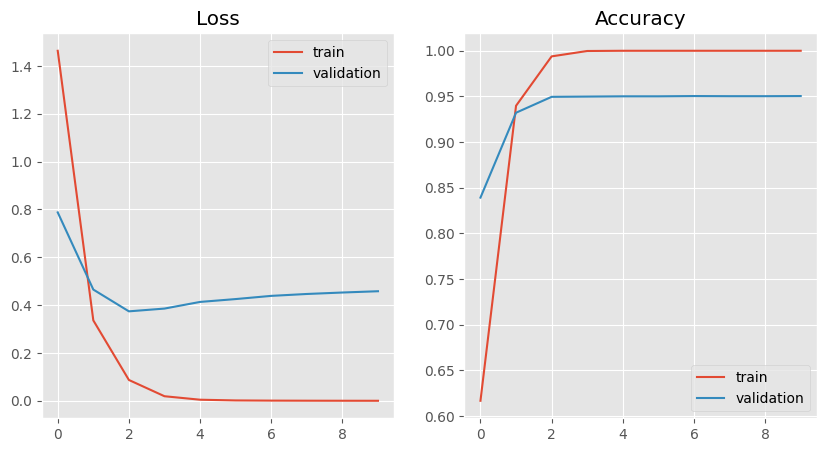

In [37]:
#plotting loss and accuracy of the best model from the three models
plot_loss_and_accuracy(cnn_model2_results)

* Our best model from the three fitted models is the second model which had an acuracy score of 92% in the test test, but clearly it's overfitting and we'll see if regularization might help.

### Tuning CNN Model

In [38]:
#Adding Dropout and l2 and l1 regularization
tuned_model = Sequential()
tuned_model.add(layers.Conv2D(64, (3,3), activation="tanh",
                              kernel_regularizer = regularizers.l2(0.005),
                              input_shape=(28,28,1)))
tuned_model.add(layers.MaxPool2D((2,2)))
tuned_model.add(layers.Dropout(0.3))
tuned_model.add(layers.Conv2D(32, (3,3), activation="tanh"))
tuned_model.add(layers.MaxPooling2D((2,2)))
tuned_model.add(layers.Dropout(0.3))
tuned_model.add(layers.Flatten())
tuned_model.add(layers.Dense(64, activation="tanh"))
tuned_model.add(layers.Dropout(0.25))
tuned_model.add(layers.Dense(24, activation="softmax"))

#Compiling the model
tuned_model.compile(loss="categorical_crossentropy",
                  optimizer="rmsprop",
                  metrics=["acc"])

#Fitting the model
tuned_model_results = tuned_model.fit(train_X_reshaped, train_y,
                                  epochs=10, batch_size=100,
                                  validation_split=0.25)

Epoch 1/10
209/209 [==============================] - 35s 159ms/step - loss: 1.9241 - acc: 0.4518 - val_loss: 1.0842 - val_acc: 0.7449
Epoch 2/10
209/209 [==============================] - 32s 153ms/step - loss: 0.7762 - acc: 0.7847 - val_loss: 0.6319 - val_acc: 0.8836
Epoch 3/10
209/209 [==============================] - 32s 153ms/step - loss: 0.4215 - acc: 0.8895 - val_loss: 0.4651 - val_acc: 0.9310
Epoch 4/10
209/209 [==============================] - 34s 161ms/step - loss: 0.2596 - acc: 0.9421 - val_loss: 0.4255 - val_acc: 0.9438
Epoch 5/10
209/209 [==============================] - 33s 156ms/step - loss: 0.1696 - acc: 0.9665 - val_loss: 0.4102 - val_acc: 0.9471
Epoch 6/10
209/209 [==============================] - 33s 157ms/step - loss: 0.1291 - acc: 0.9757 - val_loss: 0.3887 - val_acc: 0.9501
Epoch 7/10
209/209 [==============================] - 32s 153ms/step - loss: 0.0965 - acc: 0.9847 - val_loss: 0.4149 - val_acc: 0.9504
Epoch 8/10
209/209 [==============================] - 3

In [39]:
print("tuned model train data accuracy: ")
print(tuned_model.evaluate(train_X_reshaped, train_y))
print()
print("tuned model test data accuracy: ")
print(tuned_model.evaluate(test_X_reshaped, test_y))

tuned model train data accuracy: 
870/870 [==============================] - 11s 13ms/step - loss: 0.1232 - acc: 0.9877
[0.123176209628582, 0.9876756072044373]

tuned model test data accuracy: 
225/225 [==============================] - 3s 12ms/step - loss: 0.2383 - acc: 0.9308
[0.23825703561306, 0.9308421611785889]


* After reguralization the model improved to 93% accuracy with the test data

In [41]:
#Saving the tuned model
# with open("CNN.pkl", "wb") as f:
#     joblib.dump(tuned_model, f)

In [26]:
# Reloading the model
with open("CNN.pkl", "rb") as f:
    model = joblib.load(f)

In [29]:
#Making Predictions
predictions = model.predict(test_X_reshaped)
pred_labels = pd.Series([np.argmax(x) for x in predictions])

225/225 [==============================] - 4s 9ms/step


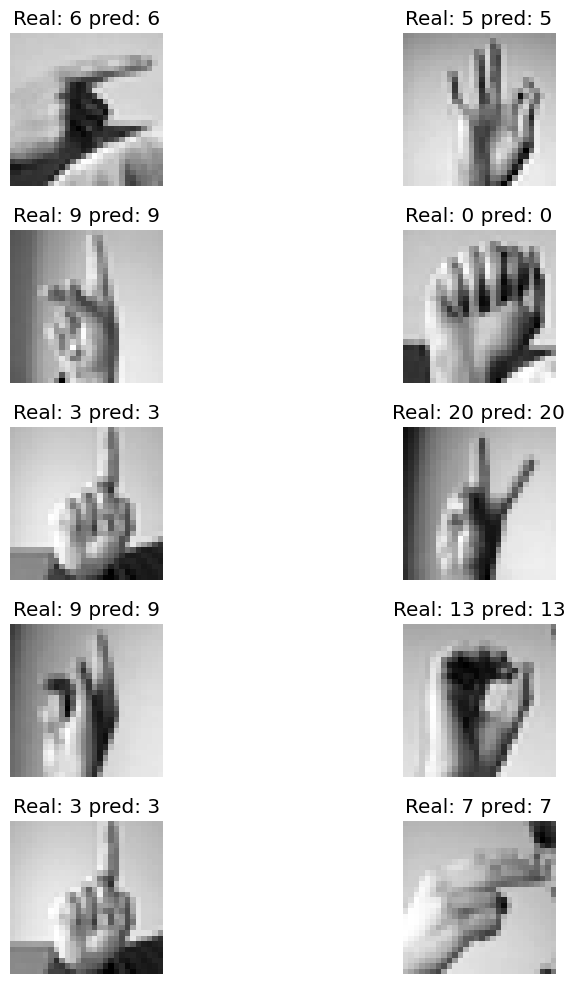

In [30]:
#displaying images
# Extract pixel values and labels
pixel_columns = test.columns[1:]  # Exclude the label column
pixel_values = test[pixel_columns].values
labels = test['label'].values
pred_labels = pred_labels.values

# Display images
fig, axes = plt.subplots(5, 2, figsize=(8, 10))
fig.tight_layout()

# Display images
for i in range(10):
    row = i // 2  # Calculate the row index
    col = i % 2   # Calculate the column index
    pixel_array = pixel_values[i].reshape(28, 28)  # Assuming the original image size is 28x28
    # Display image on the corresponding subplot
    axes[row, col].imshow(pixel_array, cmap='gray')
    axes[row, col].set_title(f"Real: {labels[i]} pred: {pred_labels[i]}")
    axes[row, col].axis('off')
    
# Show the plot
plt.show()

In [449]:
df = pd.read_csv("train.csv")
df.head()

,path,file_id,sequence_id,participant_id,phrase
0,train_landmarks/5414471.parquet,5414471,1816796431,217,3 creekhouse
1,train_landmarks/5414471.parquet,5414471,1816825349,107,scales/kuhaylah
2,train_landmarks/5414471.parquet,5414471,1816909464,1,1383 william lanier
3,train_landmarks/5414471.parquet,5414471,1816967051,63,988 franklin lane
4,train_landmarks/5414471.parquet,5414471,1817123330,89,6920 northeast 661st road


In [254]:
df1 = train[(train.label == 20)].sample(1)
df2 = train[(train.label == 8)].sample(1)
df3 = train[(train.label == 20)].sample(1)
df4 = train[(train.label == 8)].sample(1)
df5 = train[(train.label == 0)].sample(1)
df6 = train[(train.label == 12)].sample(1)
# df7 = train[(train.label == 6)].sample(1)

In [255]:
morning_df = pd.concat([df1, df2, df3, df4, df5, df6])
morning_X = morning_df.iloc[:, 1:]
morning_X /= 255
morning_reshaped = np.array(morning_X).reshape(-1, 28, 28, 1)

In [ ]:
word_dict = {0: "A", 1: "B", 2: "C", 3: "D", 4: "E", 5: "F",
             6: "G", 7: "H", 8: "I", 9: "K", 10: "L", 11: "M",
             12: "N", 13: "O", 14: "P", 15: "Q", 16: "R", 17: "S",
             18: "T", 19: "U", 20: "V", 21: "W", 22: "X", 23: "Y"}

### Raw only predictions

In [249]:
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=10,
                             zoom_range=0.1,
                             horizontal_flip=True,
                             validation_split=0.25)
train_raw_generator = datagen.flow_from_directory("train", target_size=(28,28),
                                                  batch_size=400, class_mode="categorical",
                                                  subset="training")
validation_raw_generator = datagen.flow_from_directory("train", target_size=(28,28),
                                                       batch_size=400, class_mode="categorical",
                                                       subset="validation")


Found 271 images belonging to 24 classes.
Found 77 images belonging to 24 classes.


In [250]:
train_raw_X, train_raw_y = next(train_raw_generator)
test_raw_X, test_raw_y = next(validation_raw_generator)

In [251]:
train_images_list = []
for img_array in train_raw_X:
    gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
    gray = np.expand_dims(gray, 2)
    train_images_list.append(gray)

In [252]:
test_images_list = []
for img_array in test_raw_X:
    gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
    gray = np.expand_dims(gray, 2)
    test_images_list.append(gray)

In [253]:
raw_train_X = np.array(train_images_list)
raw_test_X = np.array(test_images_list)

In [254]:
raw_train_X.shape

(271, 28, 28, 1)

In [261]:
raw_model = Sequential()
raw_model.add(layers.Conv2D(64, (3,3), activation="relu", input_shape=(28,28,1)))
raw_model.add(layers.MaxPool2D((2,2)))
raw_model.add(layers.Conv2D(32, (3,3), activation="relu"))
raw_model.add(layers.MaxPooling2D((2,2)))
raw_model.add(layers.Flatten())
raw_model.add(layers.Dense(64, activation="relu"))
raw_model.add(layers.Dense(24, activation="softmax"))

#Compiling the model
raw_model.compile(loss="categorical_crossentropy",
                  optimizer="rmsprop",
                  metrics=["acc"])

#Fitting the model
raw_model_results = raw_model.fit(raw_train_X, train_raw_y,
                                  epochs=25, batch_size=10)

Epoch 1/25
28/28 [==============================] - 2s 24ms/step - loss: 3.1864 - acc: 0.0406
Epoch 2/25
28/28 [==============================] - 1s 22ms/step - loss: 3.1745 - acc: 0.0480
Epoch 3/25
28/28 [==============================] - 1s 23ms/step - loss: 3.1636 - acc: 0.0480
Epoch 4/25
28/28 [==============================] - 1s 21ms/step - loss: 3.1278 - acc: 0.0849
Epoch 5/25
28/28 [==============================] - 1s 21ms/step - loss: 3.0569 - acc: 0.1070
Epoch 6/25
28/28 [==============================] - 1s 20ms/step - loss: 2.9212 - acc: 0.1587
Epoch 7/25
28/28 [==============================] - 1s 21ms/step - loss: 2.7328 - acc: 0.1808
Epoch 8/25
28/28 [==============================] - 1s 20ms/step - loss: 2.4659 - acc: 0.2657
Epoch 9/25
28/28 [==============================] - 1s 22ms/step - loss: 2.2268 - acc: 0.3506
Epoch 10/25
28/28 [==============================] - 1s 27ms/step - loss: 1.9952 - acc: 0.4022
Epoch 11/25
28/28 [==============================] - 1s 20m

In [262]:
print("raw model train data accuracy: ")
print(raw_model.evaluate(raw_train_X, train_raw_y))
print()
print("raw model test data accuracy: ")
print(raw_model.evaluate(raw_test_X, test_raw_y))

raw model train data accuracy: 
9/9 [==============================] - 0s 17ms/step - loss: 0.5254 - acc: 0.8303
[0.5253888368606567, 0.830258309841156]

raw model test data accuracy: 
3/3 [==============================] - 0s 19ms/step - loss: 3.5712 - acc: 0.3766
[3.571244716644287, 0.37662336230278015]


In [263]:
np.argmax(test_raw_y[0])

3

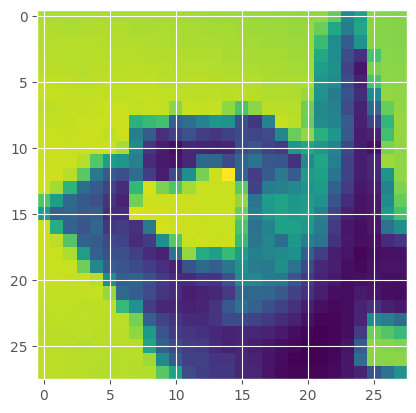

In [264]:
plt.imshow(raw_test_X[0])

In [276]:
p = raw_model.predict(raw_test_X)
pred_labels = [np.argmax(x) for x in p]

3/3 [==============================] - 0s 28ms/step


In [277]:
y_labels = [np.argmax(x) for x in test_raw_y]

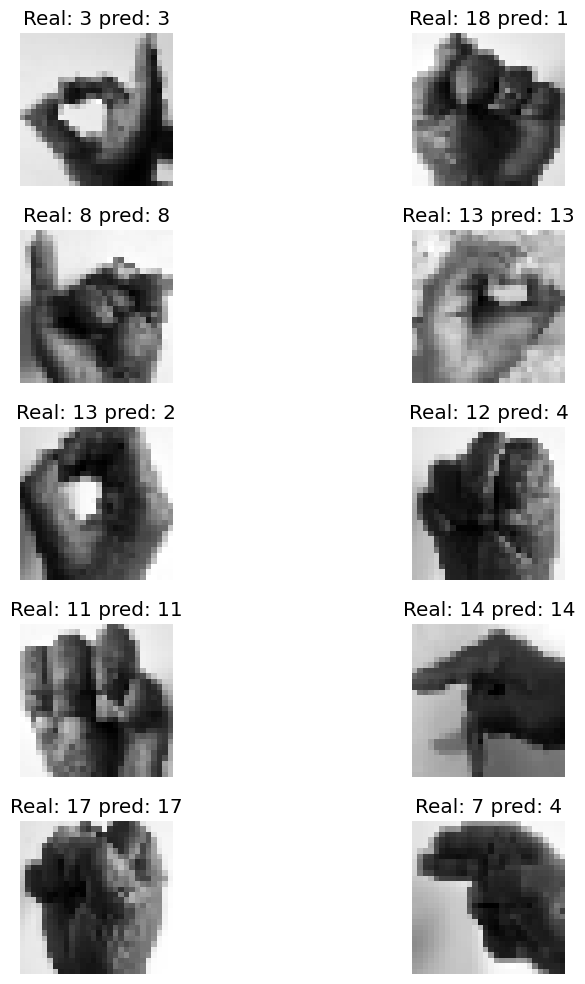

In [278]:

# pred_labels = pred_labels.values

# Display images
fig, axes = plt.subplots(5, 2, figsize=(8, 10))
fig.tight_layout()

# Display images
for i in range(10):
    row = i // 2  # Calculate the row index
    col = i % 2   # Calculate the column index
    pixel_array = raw_test_X[i]  # Assuming the original image size is 28x28
    # Display image on the corresponding subplot
    axes[row, col].imshow(pixel_array, cmap='gray')
    axes[row, col].set_title(f"Real: {y_labels[i]} pred: {pred_labels[i]}")
    axes[row, col].axis('off')
    
# Show the plot
plt.show()

In [198]:
from sklearn.model_selection import train_test_split
train_raw, test_raw = train_test_split(raw_df, random_state=180)

In [201]:
train_raw.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
261,9,185.779999,183.779999,180.306992,178.307007,176.904999,175.904999,175.904999,175.904999,174.089996,...,145.542007,160.374008,127.618996,122.564995,120.468002,135.425003,124.638000,114.893997,144.004013,181.488007
123,8,135.076004,135.076004,135.076004,136.076004,137.434998,139.434998,140.435013,141.434998,142.434998,...,52.292999,53.037003,41.572998,33.580997,25.413000,80.923004,136.962997,119.354004,84.769997,57.545002


In [206]:
train_raw_X = train_raw.iloc[:, 1:]
train_raw_y = to_categorical(train_raw.label)

test_raw_X = test_raw.iloc[:, 1:]
test_raw_y = to_categorical(test_raw.label)

In [213]:
test_raw_X /= 255
train_raw_X /= 255

In [216]:
train_raw_reshaped = np.array(train_raw_X).reshape(-1, 28, 28, 1)
test_raw_reshaped = np.array(test_raw_X).reshape(-1, 28, 28, 1)

In [218]:
raw_model = Sequential()
raw_model.add(layers.Conv2D(64, (3,3), activation="tanh", input_shape=(28,28,1)))
raw_model.add(layers.MaxPool2D((2,2)))
raw_model.add(layers.Conv2D(32, (3,3), activation="tanh"))
raw_model.add(layers.MaxPooling2D((2,2)))
raw_model.add(layers.Flatten())
raw_model.add(layers.Dense(64, activation="tanh"))
raw_model.add(layers.Dense(24, activation="softmax"))

#Compiling the model
raw_model.compile(loss="categorical_crossentropy",
                  optimizer="rmsprop",
                  metrics=["acc"])

#Fitting the model
raw_model_results = raw_model.fit(train_raw_reshaped, train_raw_y,
                                  epochs=10, batch_size=100,
                                  validation_split=0.25)


Epoch 1/10


2023-07-07 11:01:04.920552: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23975424 exceeds 10% of free system memory.
2023-07-07 11:01:04.920600: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23975424 exceeds 10% of free system memory.


1/3 [=========>....................] - ETA: 9s - loss: 3.2034 - acc: 0.0300

2023-07-07 11:01:05.416820: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23975424 exceeds 10% of free system memory.
2023-07-07 11:01:05.416878: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23975424 exceeds 10% of free system memory.


2/3 [===================>..........] - ETA: 0s - loss: 3.2040 - acc: 0.0300

2023-07-07 11:01:05.757958: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23975424 exceeds 10% of free system memory.


3/3 [==============================] - 6s 602ms/step - loss: 3.2123 - acc: 0.0329 - val_loss: 3.1702 - val_acc: 0.0563
Epoch 2/10
3/3 [==============================] - 2s 736ms/step - loss: 3.1628 - acc: 0.0563 - val_loss: 3.2204 - val_acc: 0.0423
Epoch 3/10
3/3 [==============================] - 0s 137ms/step - loss: 3.1611 - acc: 0.0798 - val_loss: 3.1917 - val_acc: 0.0141
Epoch 4/10
3/3 [==============================] - 0s 152ms/step - loss: 3.1171 - acc: 0.0563 - val_loss: 3.2533 - val_acc: 0.0423
Epoch 5/10
3/3 [==============================] - 0s 129ms/step - loss: 3.1086 - acc: 0.0423 - val_loss: 3.1380 - val_acc: 0.1268
Epoch 6/10
3/3 [==============================] - 0s 160ms/step - loss: 3.0819 - acc: 0.0892 - val_loss: 3.1853 - val_acc: 0.0845
Epoch 7/10
3/3 [==============================] - 0s 124ms/step - loss: 3.0458 - acc: 0.1174 - val_loss: 3.1976 - val_acc: 0.1127
Epoch 8/10
3/3 [==============================] - 0s 119ms/step - loss: 3.0046 - acc: 0.1502 - val_lo

In [219]:
print("raw model train data accuracy: ")
print(raw_model.evaluate(train_raw_reshaped, train_raw_y))
print()
print("raw model test data accuracy: ")
print(raw_model.evaluate(test_raw_reshaped, test_raw_y))

raw model train data accuracy: 
9/9 [==============================] - 0s 22ms/step - loss: 2.9386 - acc: 0.1232
[2.9385972023010254, 0.1232394352555275]

raw model test data accuracy: 
3/3 [==============================] - 0s 17ms/step - loss: 3.2031 - acc: 0.0211
[3.2030892372131348, 0.021052632480859756]


In [217]:
train_raw_reshaped.shape

(284, 28, 28, 1)

### Predicting Words

In [441]:
word_generator = ImageDataGenerator(rescale=1/255).flow_from_directory("morning", target_size=(28,28),
                                                           batch_size=20)

Found 4 images belonging to 1 classes.


In [442]:
word_images, word_labels = next(word_generator)
word_list = [] 
for img_array in word_images:
    gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
    gray = np.expand_dims(gray, 2)
    word_list.append(gray)

In [443]:
word_list = np.array(word_list)

In [444]:
word_list.shape

(4, 28, 28, 1)

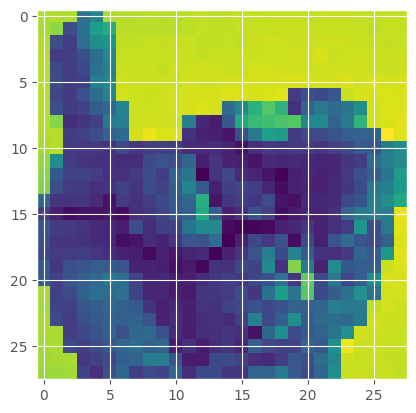

In [445]:
plt.imshow(word_list[1])

In [446]:
word_dict = {0: "A", 1: "B", 2: "C", 3: "D", 4: "E", 5: "F",
             6: "G", 7: "H", 8: "I", 9: "K", 10: "L", 11: "M",
             12: "N", 13: "O", 14: "P", 15: "Q", 16: "R", 17: "S",
             18: "T", 19: "U", 20: "V", 21: "W", 22: "X", 23: "Y"}
word_preds = cnn_model2.predict(word_list)
pred_series = pd.Series([np.argmax(x) for x in word_preds])
p = pred_series.map(word_dict)
st = "".join(p.values)
st.capitalize()

1/1 [==============================] - 0s 54ms/step


'Oqeq'

In [180]:
image = Image.open("K3.jpeg")
img_array = img_to_array(image)
# new_img_array = cv2.resize(img_array, (28,28))
gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
gray = np.expand_dims(gray, 2)

In [183]:
gray = np.round(gray)


In [184]:
new_gray = gray.reshape(-1, 28, 28, 1)
new_gray /= 255.

In [188]:
new_gray.shape

(1, 28, 28, 1)

In [186]:
pred = model.predict(morning_reshaped)

1/1 [==============================] - 0s 38ms/step


In [187]:
np.argmax(pred)

11

In [189]:
train.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,0.419608,0.462745,0.498039,0.525490,0.545098,0.560784,0.572549,0.588235,0.600000,...,0.811765,0.811765,0.811765,0.811765,0.807843,0.807843,0.807843,0.800000,0.796078,0.792157
1,6,0.607843,0.615686,0.611765,0.611765,0.611765,0.615686,0.611765,0.619608,0.619608,...,0.270588,0.584314,0.501961,0.341176,0.368627,0.639216,0.686275,0.403922,0.529412,0.584314
2,2,187.000000,188.000000,188.000000,187.000000,187.000000,186.000000,187.000000,188.000000,187.000000,...,202.000000,201.000000,200.000000,199.000000,198.000000,199.000000,198.000000,195.000000,194.000000,195.000000


In [190]:
train.iloc[2, 1:] /= 255

In [191]:
p = model.predict(np.array(train.iloc[2, 1:]).reshape(-1, 28, 28, 1))

1/1 [==============================] - 0s 37ms/step


In [192]:
np.argmax(p)

2

In [32]:
# images = []
# folder_dir = "morning"
# for image in os.listdir(folder_dir):
#     if (image.endswith(".jpeg")):
#         images.append(image)


In [ ]:
# # Fitting a CNN model
# cnn_model3 = Sequential()
# cnn_model3.add(layers.Conv2D(64, (3,3), activation="relu", input_shape=(28,28,1)))
# cnn_model3.add(layers.MaxPool2D((2,2)))
# cnn_model.add(layers.Conv2D(32, (3,3), activation="relu"))
# cnn_model.add(layers.MaxPooling2D((2,2)))
# cnn_model.add(layers.Flatten())
# cnn_model.add(layers.Dense(64, activation="relu"))
# cnn_model.add(layers.Dense(24, activation="softmax"))

# #Compiling the model
# cnn_model.compile(loss="categorical_crossentropy",
#                   optimizer="rmsprop",
#                   metrics=["acc"])

# #Fitting the model
# cnn_model_results = cnn_model.fit(train_X_reshaped, train_y,
#                                   epochs=10, batch_size=100,
#                                   validation_split=0.25)

In [ ]:
# plt.figure(figsize=(10, 10))
# for images, labels in test.take(1):
#   classification = model(images)
#   print(classification)
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     index = np.argmax(classification[i])
#     plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [ ]:
# fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(8,8))
# train_len = X_train.shape[0]

# for ax in axs.reshape(-1):
#     idx = np.random.randint(train_len)
#     ax.set_title(label_map[y_train[idx]], size=10)
#     ax.axis('off')
#     ax.imshow(X_train[idx].reshape((28,28)), cmap='gray')

In [ ]:
# Viewing 10 images from the dataset
# fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
# axes = axes.flatten()

# for i in range(10):
#     img = train_images[i]
#     label = train_labels[i]
    
#     axes[i].imshow(img)
#     axes[i].set_title(f"Label: {label}")
#     axes[i].axis('off')

# plt.tight_layout()
# plt.show()